In [1]:
# Dependencies
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

#### World Happiness Index Report - Correlation of Variables (Y2017)

In [2]:
# Load/Read Happiness Index or Ladder Score
New_HappyIndex_mx = "Data sets/Clean Happiness Index Data Sets/New_HappyIndex_mx.csv"
happiness_index = pd.read_csv(New_HappyIndex_mx)
# happiness_index.head(1)

In [3]:
# Filter year 2017 and rename variable column for analysis
filter_2017 = happiness_index.drop(labels=['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                                             '2015', '2016'], axis=1)
happiness_2017 = filter_2017.rename(columns={'2017': 'Happiness Index'})

#### GDP per capita

In [4]:
# Load/Read Log GDP per Capita
New_HI1_mx = "Data sets/Clean Happiness Index Data Sets/New_HI1_mx.csv"
gdp = pd.read_csv(New_HI1_mx)

In [5]:
# Filter year 2017 and rename variable column for analysis
gdp_filter2017 = gdp.drop(labels=['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                            '2015', '2016'], axis=1)
gdp_2017 = gdp_filter2017.rename(columns={'2017': 'GDP'})

#### Social Support

In [6]:
# Load/Read Social Support
New_HI2_mx = "Data sets/Clean Happiness Index Data Sets/New_HI2_mx.csv"
social_support = pd.read_csv(New_HI2_mx)

In [7]:
# Filter year 2017 and rename variable column for analysis
social_filter2017 = social_support.drop(labels=['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                            '2015', '2016'], axis=1)
social_support2017 = social_filter2017.rename(columns={'2017': 'Social Support'})

#### Life Expectancy at Birth

In [8]:
# Load/Read Health life expectancy at birth
New_HI3_mx = "Data sets/Clean Happiness Index Data Sets/New_HI3_mx.csv"
life_expectancy = pd.read_csv(New_HI3_mx)

In [9]:
# Filter year 2017 and rename variable column for analysis
life_filter2017 = life_expectancy.drop(labels=['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                            '2015', '2016'], axis=1)
life_expectancy2017 = life_filter2017.rename(columns={'2017': 'Life Expectancy'})

#### Freedom to make life choices

In [10]:
# Load/Read Freedom to make life choices
New_HI4_mx = "Data sets/Clean Happiness Index Data Sets/New_HI4_mx.csv"
freedom = pd.read_csv(New_HI4_mx)

In [11]:
# Filter year 2017 and rename variable column for analysis
freedom_filter2017 = freedom.drop(labels=['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                            '2015', '2016'], axis=1)
freedom_2017 = freedom_filter2017.rename(columns={'2017': 'Freedom'})

#### Generosity

In [12]:
# Load/Read Generosity
New_HI5_mx = "Data sets/Clean Happiness Index Data Sets/New_HI5_mx.csv"
generosity = pd.read_csv(New_HI5_mx)

In [13]:
# Filter year 2017 and rename variable column for analysis
generosity_filter2017 = generosity.drop(labels=['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                            '2015', '2016'], axis=1)
generosity_2017 = generosity_filter2017.rename(columns={'2017': 'Generosity'})

#### Perceptions of Corruption

In [14]:
# Load/Read Perceptions of Corruption
New_HI6_mx = "Data sets/Clean Happiness Index Data Sets/New_HI6_mx.csv"
perceptions_of_corruption = pd.read_csv(New_HI6_mx)

In [15]:
# Filter year 2017 and rename variable column for analysis
corruption_filter2017 = perceptions_of_corruption.drop(labels=['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                            '2015', '2016'], axis=1)
perceptions_corruption2017 = corruption_filter2017.rename(columns={'2017': 'Perceptions of Corruption'})

### Consolidated Y2017 Data for Correlations

In [16]:
from functools import reduce
data_sets = [happiness_2017, gdp_2017, social_support2017, life_expectancy2017, 
             freedom_2017, generosity_2017, perceptions_corruption2017]
all_2017 = reduce(lambda left,right: pd.merge(left,right,on='Country name'), data_sets)
all_2017.head(10)

,Country name,Happiness Index,GDP,Social Support,Life Expectancy,Freedom,Generosity,Perceptions of Corruption
0,Afghanistan,2.66,7.47,0.49,52.8,0.43,-0.11,0.95
1,Albania,4.64,9.38,0.64,68.4,0.75,-0.03,0.88
2,Argentina,6.04,9.85,0.91,68.6,0.83,-0.18,0.84
3,Armenia,4.29,9.08,0.70,66.6,0.61,-0.13,0.86
4,Australia,7.26,10.71,0.95,73.3,0.91,0.31,0.41
5,Austria,7.29,10.73,0.91,72.7,0.89,0.14,0.52
6,Azerbaijan,5.15,9.68,0.79,65.2,0.73,-0.24,0.65
7,Bahrain,6.23,10.68,0.88,68.5,0.91,0.13,0.00
8,Bangladesh,4.31,8.20,0.71,63.8,0.90,0.02,0.64
9,Belarus,5.55,9.75,0.90,65.8,0.62,-0.13,0.65


# Correlation 

In [17]:
# Determine Top countries by Happiness Index
top_10_happy_countries = all_2017.sort_values(['Happiness Index'], ascending=False) 
slice_columns = [2, 3, 4, 5, 6, 7]
top_10_happy_countries.drop(top_10_happy_countries.columns[slice_columns], axis=1, inplace=True)
top_10_happy_countries.head(10)

,Country name,Happiness Index
36,Finland,7.79
30,Denmark,7.59
81,Netherlands,7.46
20,Canada,7.41
54,Israel,7.33
82,New Zealand,7.33
5,Austria,7.29
108,Sweden,7.29
4,Australia,7.26
26,Costa Rica,7.23


### GDP vs Happiness

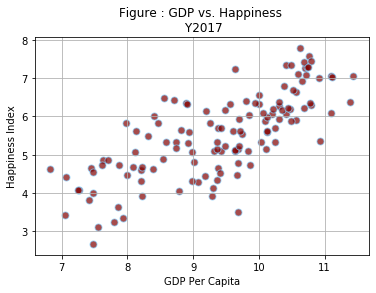

In [18]:
plt.scatter(all_2017['GDP'],all_2017['Happiness Index'],marker='o', c='maroon',
            edgecolor= 'lightskyblue', alpha=0.70, s=50)
plt.title(f"Figure : GDP vs. Happiness \n Y2017")
plt.xlabel(f"GDP Per Capita")
plt.ylabel(f"Happiness Index")
plt.grid(True)
plt.tight_layout
# plt.savefig('../Fig_GDPvsHappiness.png')
plt.show()

In [19]:
# Determine Top countries by GDP
top_10_GDP = all_2017.sort_values(['GDP'], ascending=False) 
slice_columns = [3, 4, 5, 6, 7]
top_10_GDP.drop(top_10_GDP.columns[slice_columns], axis=1, inplace=True)
top_10_GDP.head(10)

,Country name,Happiness Index,GDP
67,Luxembourg,7.06,11.44
101,Singapore,6.38,11.38
118,United Arab Emirates,7.04,11.11
53,Ireland,7.06,11.10
61,Kuwait,6.09,11.10
47,Hong Kong S.A.R. of China,5.36,10.93
120,United States,6.99,10.91
81,Netherlands,7.46,10.80
97,Saudi Arabia,6.29,10.80
109,Taiwan,6.36,10.78


In [20]:
# Determine Bottom countries by GDP
bottom_10_GDP = all_2017.sort_values(['GDP'], ascending=True) 
slice_columns = [3, 4, 5, 6, 7]
bottom_10_GDP.drop(bottom_10_GDP.columns[slice_columns], axis=1, inplace=True)
bottom_10_GDP.head(10)

,Country name,Happiness Index,GDP
84,Niger,4.62,6.83
70,Malawi,3.42,7.05
65,Liberia,4.42,7.07
100,Sierra Leone,4.09,7.25
69,Madagascar,4.08,7.26
45,Haiti,3.82,7.41
17,Burkina Faso,4.65,7.44
0,Afghanistan,2.66,7.47
21,Chad,4.56,7.47
116,Uganda,4.00,7.48


In [21]:
# Inspect for Low Happiness but Higher GDP outlier countries within a set criteria for analysis
outlier_gdp= all_2017[(all_2017["Happiness Index"]<=6) & (all_2017["GDP"] >=10)] 
slice_columns = [3, 4, 5, 6, 7]
outlier_gdp.drop(outlier_gdp.columns[slice_columns], axis=1, inplace=True)
# Sort by greatest gdp
LowHappy_HighGDP = outlier_gdp.sort_values(['GDP', 'Happiness Index'], ascending=[False, False]) 
# LowHappy_HighGDP.to_csv('LowHappy_HighGDP_2017.csv')
LowHappy_HighGDP

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country name,Happiness Index,GDP
47,Hong Kong S.A.R. of China,5.36,10.93
56,Japan,5.91,10.57
105,South Korea,5.87,10.49
35,Estonia,5.94,10.31
71,Malaysia,5.34,10.25
93,Portugal,5.71,10.24
63,Latvia,5.98,10.13
114,Turkey,5.61,10.13
95,Russia,5.58,10.12
42,Greece,5.15,10.11


In [22]:
# Lowest happiness index country (within set criteria of outliers) but high GDP 
LowHappy_HighGDP.loc[LowHappy_HighGDP['Happiness Index'].idxmin()]

Country name       Greece
Happiness Index      5.15
GDP                 10.11
Name: 42, dtype: object

In [23]:
# Greatest GDP (within set criteria of outliers) but fairly low happiness 
LowHappy_HighGDP.loc[LowHappy_HighGDP['GDP'].idxmax()]

Country name       Hong Kong S.A.R. of China
Happiness Index                         5.36
GDP                                    10.93
Name: 47, dtype: object

In [24]:
# Inspect for High Happiness but lower GDP outliers 
HighHappy_lowGDP = outlier_gdp.sort_values(['Happiness Index'], ascending=False)
HighHappy_LowGDP = HighHappy_lowGDP[(HighHappy_lowGDP['Happiness Index']>=5.5) & (HighHappy_lowGDP['GDP']<=10.5)]
# LowHappy_HighGDP.to_csv('LowHappy_HighGDP_2017.csv')
HighHappy_LowGDP

,Country name,Happiness Index,GDP
63,Latvia,5.98,10.13
35,Estonia,5.94,10.31
58,Kazakhstan,5.88,10.09
105,South Korea,5.87,10.49
93,Portugal,5.71,10.24
114,Turkey,5.61,10.13
95,Russia,5.58,10.12


#### Observations: 
* Interesting countries 
---
    (Low Happiness, High GDP) : "Greece, Hong Kong????" +  South Korea, Russia, Croatia, Hungary  ?
    (High Happiness, Low GDP) : 

* Correlation Coefficient & Linear Regression

In [25]:
def linregres_func(x_values, y_values, x_label, y_label, ann_horizontal, ann_vertical): # savefile
                                                                            
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    eq_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values, c='lightskyblue', edgecolor='maroon')
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(eq_line, (ann_horizontal, ann_vertical), fontsize=11, color='red')
    plt.title(f" {x_label} vs {y_label} \n Y2017")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout
    print(f"The r-squared is: {rvalue}")
#     plt.savefig(f'figures/{savefile}')
    plt.show()

The r-squared is: 0.7413645704025489


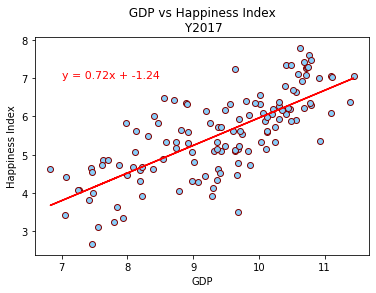

In [26]:
linregres_func(all_2017["GDP"], all_2017["Happiness Index"], 'GDP', 'Happiness Index', 7, 7)

### Social Support vs Happiness

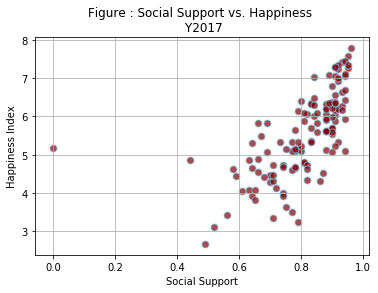

In [27]:
plt.scatter(all_2017['Social Support'],all_2017['Happiness Index'],marker='o', c='maroon',
            edgecolor= 'lightskyblue', alpha=0.70, s=50)
plt.title(f"Figure : Social Support vs. Happiness \n Y2017")
plt.xlabel(f"Social Support")
plt.ylabel(f"Happiness Index")
plt.grid(True)
plt.tight_layout
# plt.savefig('../Fig_Social SupportvsHappiness.png')
plt.show()

In [28]:
# Determine Top countries by Social Support
top_10_Social_Support = all_2017.sort_values(['Social Support'], ascending=False) 
slice_columns = [2, 4, 5, 6, 7]
top_10_Social_Support.drop(top_10_Social_Support.columns[slice_columns], axis=1, inplace=True)
top_10_Social_Support.head(10)

,Country name,Happiness Index,Social Support
36,Finland,7.79,0.96
30,Denmark,7.59,0.95
82,New Zealand,7.33,0.95
4,Australia,7.26,0.95
73,Malta,6.68,0.94
16,Bulgaria,5.10,0.94
119,United Kingdom,7.10,0.94
122,Uzbekistan,6.42,0.94
53,Ireland,7.06,0.94
35,Estonia,5.94,0.94


The r-squared is: 0.6438603376980208


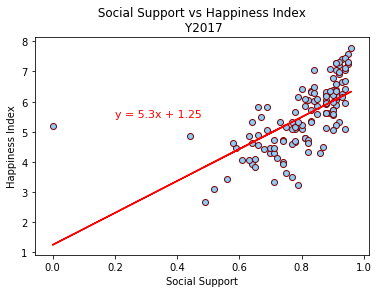

In [29]:
linregres_func(all_2017["Social Support"], all_2017["Happiness Index"], 'Social Support', 'Happiness Index', 0.2, 5.5)

### Life Expectancy vs Happiness

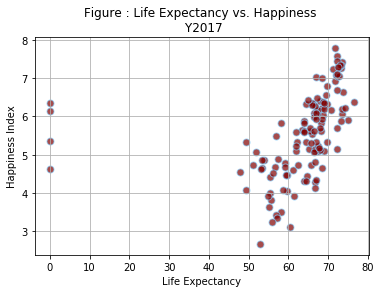

In [30]:
plt.scatter(all_2017['Life Expectancy'],all_2017['Happiness Index'],marker='o', c='maroon',
            edgecolor= 'lightskyblue', alpha=0.70, s=50)
plt.title(f"Figure : Life Expectancy vs. Happiness \n Y2017")
plt.xlabel(f"Life Expectancy")
plt.ylabel(f"Happiness Index")
plt.grid(True)
plt.tight_layout
# plt.savefig('../Fig_Life ExpectancyvsHappiness.png')
plt.show()

In [31]:
# Check countries with Zero value?
zero_life = all_2017[(all_2017["Life Expectancy"]<=1)] #& (HappinessIndex["Log GDP per capita"]<=9.5)] 
zero_life.head(20)

,Country name,Happiness Index,GDP,Social Support,Life Expectancy,Freedom,Generosity,Perceptions of Corruption
47,Hong Kong S.A.R. of China,5.36,10.93,0.83,0.0,0.83,0.13,0.42
60,Kosovo,6.15,9.19,0.79,0.0,0.86,0.12,0.93
87,Palestinian Territories,4.63,8.39,0.82,0.0,0.63,-0.16,0.83
109,Taiwan,6.36,10.78,0.89,0.0,0.76,-0.07,0.74


The r-squared is: 0.34118940772005485


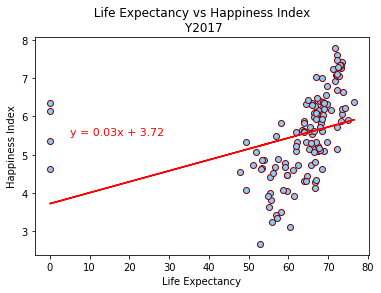

In [32]:
linregres_func(all_2017["Life Expectancy"], all_2017["Happiness Index"], 'Life Expectancy', 'Happiness Index', 5, 5.5)

### Freedom vs Happiness

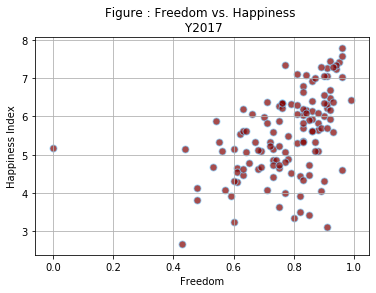

In [33]:
plt.scatter(all_2017['Freedom'],all_2017['Happiness Index'],marker='o', c='maroon',
            edgecolor= 'lightskyblue', alpha=0.70, s=50)
plt.title(f"Figure : Freedom vs. Happiness \n Y2017")
plt.xlabel(f"Freedom")
plt.ylabel(f"Happiness Index")
plt.grid(True)
plt.tight_layout
# plt.savefig('../Fig_FreedomvsHappiness.png')
plt.show()

In [34]:
# Check countries with Zero value?
zero_freedom = all_2017[(all_2017["Freedom"]<=0.2)] #& (HappinessIndex["Log GDP per capita"]<=9.5)] 
zero_freedom.head(20)

,Country name,Happiness Index,GDP,Social Support,Life Expectancy,Freedom,Generosity,Perceptions of Corruption
124,Vietnam,5.18,8.74,0.0,67.7,0.0,0.0,0.0


The r-squared is: 0.4675948025468307


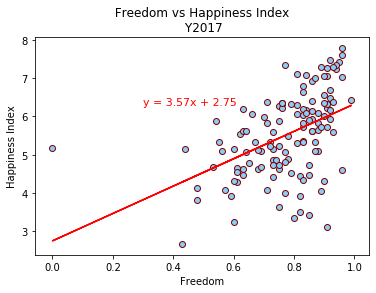

In [35]:
linregres_func(all_2017["Freedom"], all_2017["Happiness Index"], 'Freedom', 'Happiness Index', 0.3, 6.3)

In [36]:
all_2017.head()

,Country name,Happiness Index,GDP,Social Support,Life Expectancy,Freedom,Generosity,Perceptions of Corruption
0,Afghanistan,2.66,7.47,0.49,52.8,0.43,-0.11,0.95
1,Albania,4.64,9.38,0.64,68.4,0.75,-0.03,0.88
2,Argentina,6.04,9.85,0.91,68.6,0.83,-0.18,0.84
3,Armenia,4.29,9.08,0.70,66.6,0.61,-0.13,0.86
4,Australia,7.26,10.71,0.95,73.3,0.91,0.31,0.41


### Generosity vs Happiness

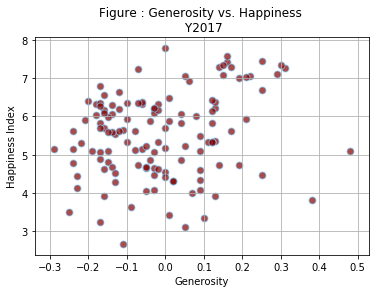

In [37]:
plt.scatter(all_2017['Generosity'],all_2017['Happiness Index'],marker='o', c='maroon',
            edgecolor= 'lightskyblue', alpha=0.70, s=50)
plt.title(f"Figure : Generosity vs. Happiness \n Y2017")
plt.xlabel(f"Generosity")
plt.ylabel(f"Happiness Index")
plt.grid(True)
plt.tight_layout
# plt.savefig('../Fig_GenerosityvsHappiness.png')
plt.show()

In [38]:
# Inspect Generosity outliers 
outlier_Generosity = all_2017[(all_2017["Happiness Index"]<=5.5) & (all_2017["Generosity"] >=0.3)] 
slice_columns = [ 3, 4, 5, 7]
outlier_Generosity.drop(outlier_Generosity.columns[slice_columns], axis=1, inplace=True)
outlier_Generosity

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country name,Happiness Index,GDP,Generosity
45,Haiti,3.82,7.41,0.38
50,Indonesia,5.10,9.32,0.48


#### Observations: 
* Interesting country
---
    (Top in Generosity, not high GDP, but Happier?) : "Indonesia" 

The r-squared is: 0.2257819992813793


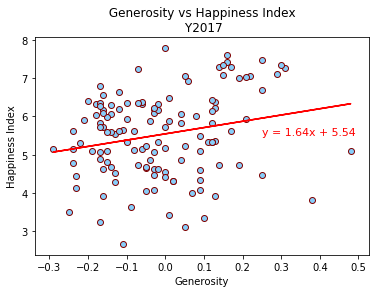

In [39]:
linregres_func(all_2017["Generosity"], all_2017["Happiness Index"], 'Generosity', 'Happiness Index', 0.25, 5.5)

### Perceptions of Corruption vs Happiness

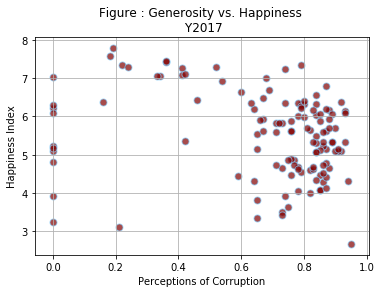

In [41]:
plt.scatter(all_2017['Perceptions of Corruption'],all_2017['Happiness Index'],marker='o', c='maroon',
            edgecolor= 'lightskyblue', alpha=0.70, s=50)
plt.title(f"Figure : Generosity vs. Happiness \n Y2017")
plt.xlabel(f"Perceptions of Corruption")
plt.ylabel(f"Happiness Index")
plt.grid(True)
plt.tight_layout
# plt.savefig('../Fig_Perceptions_of_CorruptionvsHappiness.png')
plt.show()

In [42]:
# Check countries with Zero value?
zero_Perceptions_of_Corruption = all_2017[(all_2017["Perceptions of Corruption"]<=0.0)] #& (HappinessIndex["Log GDP per capita"]<=9.5)] 
zero_Perceptions_of_Corruption

,Country name,Happiness Index,GDP,Social Support,Life Expectancy,Freedom,Generosity,Perceptions of Corruption
7,Bahrain,6.23,10.68,0.88,68.5,0.91,0.13,0.0
23,China,5.10,9.63,0.77,69.0,0.88,-0.19,0.0
33,Egypt,3.93,9.28,0.64,61.4,0.59,-0.16,0.0
57,Jordan,4.81,9.02,0.81,66.6,0.77,-0.15,0.0
61,Kuwait,6.09,11.10,0.85,66.5,0.88,-0.03,0.0
97,Saudi Arabia,6.29,10.80,0.84,66.0,0.81,-0.14,0.0
115,Turkmenistan,5.23,9.70,0.91,61.8,0.72,0.05,0.0
118,United Arab Emirates,7.04,11.11,0.84,66.9,0.96,0.21,0.0
124,Vietnam,5.18,8.74,0.00,67.7,0.00,0.00,0.0
125,Yemen,3.25,7.79,0.79,55.9,0.60,-0.17,0.0


The r-squared is: -0.23842005505217434


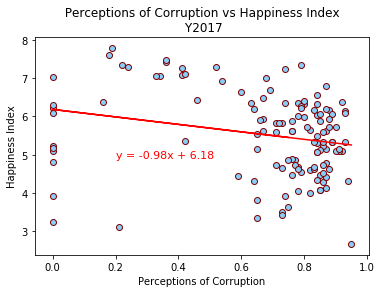

In [43]:
linregres_func(all_2017["Perceptions of Corruption"], all_2017["Happiness Index"], 'Perceptions of Corruption', 'Happiness Index', 0.2, 4.9)

In [48]:
# Load/Read Happiness Index or Ladder Score
pd.set_option('display.max_columns', None)
TGE_Sheri = "Data sets/TGE_Sheri.csv"
other_2017 = pd.read_csv(TGE_Sheri)
other_2017.head(1)

,Country,Code,Year,Happiness Index,Log GDP per capita,Social Support,Life expectancy,Freedom,Generosity,Perceptions of corruption,GINI of household,Poverty percent of population,Public spending on education,Literacy rate,Tourist arrivals,Int tourism revenue,Fragile state index,Security threats index,Brain drain index,Unemployment rate
0,Afghanistan,AFG,2017,2.661718,7.472197,0.49088,52.799999,0.427011,-0.110382,0.954393,0.286599,NaN,15.66,NaN,NaN,16.0,17.3,1.0,8.2,11.18


The r-squared is: nan


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


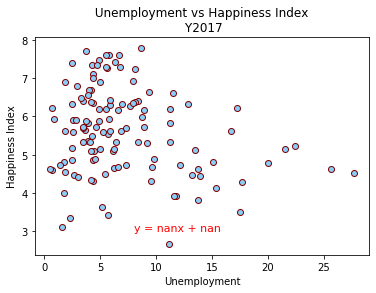

In [47]:
linregres_func(other_2017["Unemployment"], other_2017["Happiness Index"], 'Unemployment', 'Happiness Index', 8, 3)